<a href="https://colab.research.google.com/github/janputra/Physic-Informed-Neural-Networks-Practices-/blob/main/PINN_Horn_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pyDOE

Requirement already up-to-date: pyDOE in /usr/local/lib/python3.6/dist-packages (0.3.8)


In [ ]:
# import pathlib 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import os
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold
from tensorflow.keras.utils import plot_model
from pyDOE import lhs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
multi=5/1000000
l0=125.7
x = (1)*lhs(1, 2000)
x= np.append(x,[0,1])



In [ ]:
X=tf.convert_to_tensor(x,tf.float32)
u0=-5.0/1000/l0
u0=np.array(u0).reshape(1,1)
u1=5.0/1000/l0
u1=np.array(u1).reshape(1,1)

x0=0
x0=np.array(x0).reshape(1,1)
x1=1
x1=np.array(x1).reshape(1,1)

In [ ]:
u1

array([[3.97772474e-05]])

In [ ]:
def build_model(layers):
    i = Input(shape=(layers[0],))
    o = Dense(layers[1],activation="tanh")(i) 
    for x in layers[2:-1]:
        o = Dense(x,activation="tanh")(o)
    o = Dense(layers[-1],activation="linear")(o)
    model=Model(inputs=i, outputs=o)
    return model


In [ ]:
layers=[1,40,40,40,40,40,1]
model=build_model(layers)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 40)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 41    

In [ ]:
  # The actual PINN
k = tf.Variable([1.0], dtype=tf.float32)


def _wrap_training_variables():
    var=model.trainable_variables
    #var.extend([k])
    return var

def _loss():
    with tf.GradientTape(persistent=True) as tape:
       tape.watch(X)

       u=model(X)
       # Deriving INSIDE the tape (since we’ll need the x derivative of this later, u_xx)
       u_x = tape.gradient(u, X)
     
    u_xx = tape.gradient(u_x, X)

    # Letting the tape go
    del tape

    # Buidling the PINNs
    bc1= u_xx + ((0.024992781651470113*l0)**2)*u  
 
    return tf.reduce_mean(tf.square(bc1)) + tf.square(model(x0)-u0) + tf.square(model(x1)-u1) + tf.square(u_x[-1]) + tf.square(u_x[-2]) 


def _grad():
    with tf.GradientTape() as tape:
          loss_value = _loss()
    return loss_value, tape.gradient(loss_value,_wrap_training_variables())

def fit():
    for epoch in range(epochs):
        # Optimization step
        loss_value, grads = _grad()
        optimizer.apply_gradients(zip(grads, _wrap_training_variables()))

    print ('epoch : ',epoch,' loss : ',loss_value )
    

def predict(x):
    return model(x)





In [ ]:
test=np.arange(0,127.5,0.1)
test=test/l0


epoch :  29  loss :  tf.Tensor([[0.47900793]], shape=(1, 1), dtype=float32)


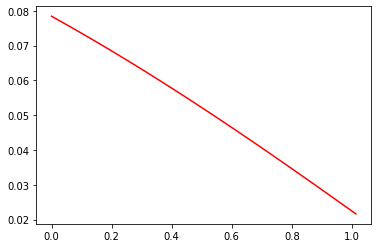

In [ ]:
optimizer = tf.keras.optimizers.Adam(
  learning_rate=0.01)
epochs =30
fit()

x=model.predict(test)
plt.figure()
plt.plot(test,x, color='r')

plt.show()

epoch :  29  loss :  tf.Tensor([[0.00055284]], shape=(1, 1), dtype=float32)


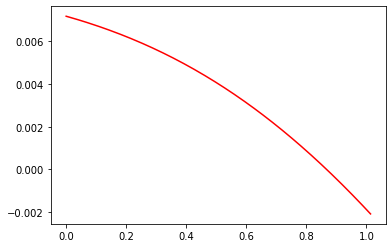

In [ ]:
optimizer = tf.keras.optimizers.Adam(
  learning_rate=0.001)
epochs =30
fit()

x=model.predict(test)
plt.figure()
plt.plot(test,x, color='r')

plt.show()

epoch :  29  loss :  tf.Tensor([[7.316718e-05]], shape=(1, 1), dtype=float32)


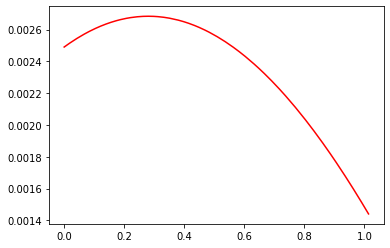

In [ ]:
optimizer = tf.keras.optimizers.Adam(
  learning_rate=0.0005)
epochs =30
fit()

x=model.predict(test)
plt.figure()
plt.plot(test,x, color='r')

plt.show()

In [ ]:
x.shape


(1275, 1)

In [ ]:
x[1256]

array([0.00452751], dtype=float32)

In [ ]:
x[0]

array([-0.00143997], dtype=float32)

In [ ]:
k

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>